<a href="https://colab.research.google.com/github/fujifadhilah/dash-portofolio/blob/main/Rev2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A.1 installing package
!pip install pandas
!pip install pandasql
!pip install plotly
#!pip install dash
!pip install jupyter-dash
!pip install --upgrade 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=af6ef948f22ce1a551dd247a48ae9ac7ea87545a24bd43acf047413754f4a8f2
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━

In [ ]:
# Library data manipulation
import pandas as pd
import pandasql as ps

# Library Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# Library Dashboarding
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lokasi = '/content/drive/My Drive/DQLab_listings(22Sep2022).xlsx'
listings = pd.read_excel(lokasi)
listings.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [ ]:
lokasi_2 = '/content/drive/My Drive/DQLab_nieghbourhood(22Sep2022).xlsx'
nieghbourhood = pd.read_excel(lokasi_2)
nieghbourhood.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [ ]:
lokasi_3 = '/content/drive/My Drive/DQLab_reviews(22Sep2022).xlsx'
reviews = pd.read_excel(lokasi_3)
reviews.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [ ]:
ln_df = ps.sqldf("""
                      select*from listings join nieghbourhood on listings.neighbourhood = nieghbourhood.neighbourhood
                      """)
ln_df.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365,2,Central Region,Bukit Timah
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,27,East Region,Tampines
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265,27,East Region,Tampines
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365,27,East Region,Tampines
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296,1,Central Region,Bukit Merah


In [ ]:
lnr_df = ps.sqldf("""
                      select*from ln_df join reviews on ln_df.id = reviews.listing_id
                      """)
lnr_df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,Unnamed: 0,listing_id,date
0,27,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,28,71609,2018-07-14
1,27,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,29,71609,2019-01-06
2,27,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,30,71609,2019-07-27
3,27,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,31,71609,2019-08-11
4,27,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,32,71609,2019-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49690,17,712907319520281088,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,58245,712907319520281088,2022-09-14
49691,17,712907319520281088,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,58246,712907319520281088,2022-09-15
49692,17,712907319520281088,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,58247,712907319520281088,2022-09-16
49693,54,713608959415048192,TeegaSuites07@PuteriHarbour 2-4pax WiFi Netflix,147891691,Weepin,Western Water Catchment,1.416736,103.654354,Entire home/apt,36,1,139,West Region,58248,713608959415048192,2022-09-17


In [ ]:
reviews.sort_values(by='date', ascending=False)


,Unnamed: 0,listing_id,date
49539,58094,685737890066148608,2022-09-22
41217,49772,45962749,2022-09-22
1221,2825,4008423,2022-09-22
46827,55382,580226596963352704,2022-09-22
19692,28247,28212124,2022-09-22
...,...,...,...
5653,12037,12043317,2018-01-01
2890,6102,6716844,2018-01-01
3832,8417,8800763,2018-01-01
10141,18574,20775615,2018-01-01


In [ ]:
lnr2_df = lnr_df.drop(['Unnamed: 0', 'id'], axis=1)
lnr2_df

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date
0,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,71609,2018-07-14
1,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,71609,2019-01-06
2,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,71609,2019-07-27
3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,71609,2019-08-11
4,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,East Region,71609,2019-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49690,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-14
49691,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-15
49692,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-16
49693,TeegaSuites07@PuteriHarbour 2-4pax WiFi Netflix,147891691,Weepin,Western Water Catchment,1.416736,103.654354,Entire home/apt,36,1,139,West Region,713608959415048192,2022-09-17


melakukan pengecekan data duplikat pada data unique

In [ ]:
listings_id_more1 = listings['id'].value_counts()

In [ ]:
np.shape(listings_id_more1[listings_id_more1 > 1])

(0,)

In [ ]:
print("Ini merupakan total data unik dari listing_id:")
np.shape(listings_id_more1[listings_id_more1 == 1])

Ini merupakan total data unik dari listing_id:


(4161,)

In [ ]:
print("Ini merupakan dimensional table listings:")
listings.shape

Ini merupakan dimensional table listings:


(4161, 12)

In [ ]:
# Sehingga listings_id tidak ada data duplikat (unique)

In [ ]:
print("Ini merupakan data terbawah:")
lnr2_df.tail()

Ini merupakan data terbawah:


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date
49690,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-14
49691,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-15
49692,Charming hostel in singapore (Boat Quay),478783235,Wonders Hostel,Singapore River,1.285854,103.849037,Shared room,31,1,342,Central Region,712907319520281088,2022-09-16
49693,TeegaSuites07@PuteriHarbour 2-4pax WiFi Netflix,147891691,Weepin,Western Water Catchment,1.416736,103.654354,Entire home/apt,36,1,139,West Region,713608959415048192,2022-09-17
49694,【R&F】1Bedroom City&Sea View TREX Boutique Home...,409792363,Trex_,Woodlands,1.459560,103.770570,Entire home/apt,52,1,335,North Region,716323913372695424,2022-09-18


In [ ]:
lnr2_df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'availability_365',
       'neighbourhood_group', 'listing_id', 'date'],
      dtype='object')

Pengecekan missing value

In [ ]:
#apakah ada null pada values?
lnr2_df.isnull().values.any()

False

In [ ]:
# tidak ada missing value

mengecek outlier

In [ ]:
# Mencari tahu distribusi statistik data
print('\nPersebaran data sebelum ditangani Outlier: ')
lnr2_df[["price", "minimum_nights"]].head()


Persebaran data sebelum ditangani Outlier: 


,price,minimum_nights
0,145,92
1,145,92
2,145,92
3,145,92
4,145,92


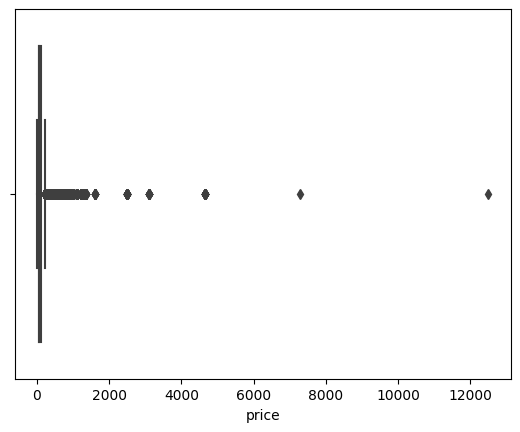

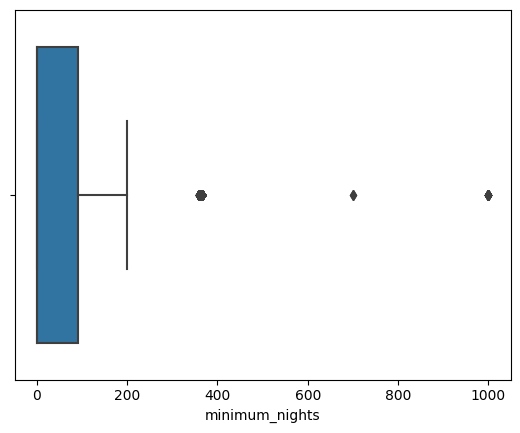

In [ ]:
# Creating Box Plot
# Menyiapkan Visualisasi
import seaborn as sns
sns.boxplot(x=lnr2_df["price"])
plt.show()
plt.figure()
sns.boxplot(x=lnr2_df["minimum_nights"])
plt.show()

In [ ]:
#terdapat outlier pada kolom price dan minimum_night
#tidak menghandling outlier karena tujuannya ingin mengidentifikasi semua data poin 

Data Visualization

In [ ]:
lnr2_df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date
0,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2018-07-14
1,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-01-06
2,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-07-27
3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-08-11
4,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-09-07


In [ ]:
lnr2_df.describe()

,host_id,latitude,longitude,price,minimum_nights,availability_365,listing_id
count,4.969500e+04,49695.000000,49695.000000,49695.000000,49695.000000,49695.000000,4.969500e+04
mean,1.561167e+08,1.388684,103.795185,116.397626,31.662904,210.132227,4.511530e+16
std,1.198799e+08,0.076462,0.069579,204.446316,56.072077,123.943148,1.611981e+17
min,2.366600e+04,1.256442,103.638880,15.000000,1.000000,0.000000,7.160900e+04
25%,4.322862e+07,1.307200,103.762080,47.000000,1.000000,90.000000,2.242480e+07
50%,1.367001e+08,1.417110,103.770240,64.000000,1.000000,181.000000,3.200119e+07
75%,2.582789e+08,1.462310,103.852170,118.000000,92.000000,344.000000,4.154453e+07
max,4.787832e+08,1.488000,103.977662,12494.000000,1000.000000,365.000000,7.163239e+17


In [ ]:
# rata2 harga listings_name secara keseluruhan adalah 116.397626	== 116 dolar == 1.281.290 rupiah /malam

In [ ]:
# Penambahan kolom bulan
lnr2_df['order_month'] = lnr2_df['date'].str.slice(0,7)
lnr2_df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date,order_month
0,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2018-07-14,2018-07
1,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-01-06,2019-01
2,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-07-27,2019-07
3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-08-11,2019-08
4,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-09-07,2019-09


In [ ]:
# Penambahan kolom tahun
lnr2_df['order_year'] = lnr2_df['date'].str.slice(0,4)
lnr2_df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date,order_month,order_year
0,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2018-07-14,2018-07,2018
1,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-01-06,2019-01,2019
2,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-07-27,2019-07,2019
3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-08-11,2019-08,2019
4,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-09-07,2019-09,2019


In [ ]:
# Mencari jumlah order. 'count date per listingg_id'
lnr22_df = ps.sqldf("""
                      select listing_id, name, price, order_month, count(*)
                      from lnr2_df
                      group by listing_id
                      """)
lnr22_df


,listing_id,name,price,order_month,count(*)
0,71609,Ensuite Room (Room 1 & 2) near EXPO,145,2018-07,10
1,71896,B&B Room 1 near Airport & EXPO,85,2019-07,4
2,71903,Room 2-near Airport & EXPO,85,2018-02,23
3,275344,15 mins to Outram MRT Single Room,49,2018-09,5
4,289234,Booking for 3 bedrooms,184,2018-04,4
...,...,...,...,...,...
2481,712014563808839936,Queen Capsule Bed (mixed dorm),60,2022-09,2
2482,712121357550091520,Single Capsule (Shared Room),29,2022-09,1
2483,712907319520281088,Charming hostel in singapore (Boat Quay),31,2022-09,3
2484,713608959415048192,TeegaSuites07@PuteriHarbour 2-4pax WiFi Netflix,36,2022-09,1


In [ ]:
lnr22_df.rename(columns={'count(*)':'count_order'}, inplace=True)
lnr22_df.head()

,listing_id,name,price,order_month,count_order
0,71609,Ensuite Room (Room 1 & 2) near EXPO,145,2018-07,10
1,71896,B&B Room 1 near Airport & EXPO,85,2019-07,4
2,71903,Room 2-near Airport & EXPO,85,2018-02,23
3,275344,15 mins to Outram MRT Single Room,49,2018-09,5
4,289234,Booking for 3 bedrooms,184,2018-04,4


In [ ]:
lnr22_df.describe()

,listing_id,price,count_order
count,2.486000e+03,2486.000000,2486.000000
mean,1.154330e+17,163.972245,19.989944
std,2.458893e+17,355.829136,38.227092
min,7.160900e+04,15.000000,1.000000
25%,2.412669e+07,54.000000,2.000000
50%,3.723853e+07,88.000000,5.000000
75%,5.177657e+07,183.000000,19.000000
max,7.163239e+17,12494.000000,413.000000


In [ ]:
# rata2 harga 164 dolar/malam

In [ ]:
listing_name_high_2 = ps.sqldf("""
                      select listing_id, name, price, order_month, count_order
                      from lnr22_df
                      where price = 164
                      order by price asc
                      """)
listing_name_high_2

,listing_id,name,price,order_month,count_order
0,9866985,Beary's 2 Bed Private Room,164,2018-05,4
1,15792808,Chinatown Studio No window,164,2018-01,147
2,51809454,"Double, Window, SHORT OVERNIGHT, 13 hours: 6PM...",164,2022-02,7


In [ ]:
lnr2_df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date,order_month,order_year
0,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2018-07-14,2018-07,2018
1,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-01-06,2019-01,2019
2,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-07-27,2019-07,2019
3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-08-11,2019-08,2019
4,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,East Region,71609,2019-09-07,2019-09,2019


In [ ]:
# listings name dg harga pasaran(rata2)

In [ ]:
lnr222_df = ps.sqldf("""
                      select listing_id, name, price, order_month, count(*) as order_count
                      from lnr2_df
                      where listing_id in ('9866985', '15792808', '51809454')
                      group by listing_id, order_month
                      """)
lnr222_df.head()

,listing_id,name,price,order_month,order_count
0,9866985,Beary's 2 Bed Private Room,164,2018-05,1
1,9866985,Beary's 2 Bed Private Room,164,2018-06,1
2,9866985,Beary's 2 Bed Private Room,164,2018-07,1
3,9866985,Beary's 2 Bed Private Room,164,2019-01,1
4,15792808,Chinatown Studio No window,164,2018-01,2


In [ ]:
fig_line = px.line(lnr222_df,x="order_month",y="order_count",color="name",template="simple_white", color_discrete_sequence=["#569DAA","#5BC0F8","#FED049"], markers=True)

#modif background
fig_line.update_layout(paper_bgcolor="dark grey",plot_bgcolor="dark grey")

#Modify Title
fig_line.update_layout(title="<b> Tren Jumlah Penyewaan pada Daftar Listing's Name dengan Harga Pasaran </b>", title_x=0.5, title_font=dict(size=20,family="arial"))

#Update X & Y Labels
fig_line.update_xaxes(title="<b>Order Month</b>",title_font=dict(size=13,family="arial"))
fig_line.update_yaxes(title="<b>Order Count</b>",title_font=dict(size=13,family="arial"))

# Update Line & Markers
fig_line.update_traces(line=dict(width=3),marker=dict(size=8))

# Show Plot
fig_line.show()

total order price = price*order_count

In [ ]:
# Penambahan kolom total order price = price*order_count
lnr222_df['total_order_price'] = lnr222_df['price']*lnr222_df['order_count']
lnr222_df.head()

,listing_id,name,price,order_month,order_count,total_order_price
0,9866985,Beary's 2 Bed Private Room,164,2018-05,1,164
1,9866985,Beary's 2 Bed Private Room,164,2018-06,1,164
2,9866985,Beary's 2 Bed Private Room,164,2018-07,1,164
3,9866985,Beary's 2 Bed Private Room,164,2019-01,1,164
4,15792808,Chinatown Studio No window,164,2018-01,2,328


In [ ]:
fig_line_2 = px.line(lnr222_df,x="order_month",y="total_order_price",color="name",template="simple_white", color_discrete_sequence=["#569DAA","#5BC0F8","#FED049"], markers=True)

#modif background
fig_line_2.update_layout(paper_bgcolor="dark grey",plot_bgcolor="dark grey")

#Modify Title
fig_line_2.update_layout(title="<b> Tren Total Harga Sewa dari Listing's Name dengan Harga Pasaran</b>", title_x=0.5, title_font=dict(size=20,family="arial"))

#Update X & Y Labels
fig_line_2.update_xaxes(title="<b>Order Month</b>",title_font=dict(size=13,family="arial"))
fig_line_2.update_yaxes(title="<b>Total Order Price (Dollar) </b>", title_font=dict(size=13,family="arial"))

# Update Line & Markers
fig_line_2.update_traces(line=dict(width=3),marker=dict(size=8))

# Show Plot
fig_line_2.show()

komposisi dari Total Harga Sewa All Listing's Name per Neighbourhood Group

In [ ]:
#komposisi dari Total Harga Sewa All Listing's Name per Neighbourhood Group

lnr22_df['total_harga_sewa_all_name'] = lnr22_df['price']*lnr22_df['count_order']
lnr22_df.head()

,listing_id,name,price,order_month,count_order,total_harga_sewa_all_name
0,71609,Ensuite Room (Room 1 & 2) near EXPO,145,2018-07,10,1450
1,71896,B&B Room 1 near Airport & EXPO,85,2019-07,4,340
2,71903,Room 2-near Airport & EXPO,85,2018-02,23,1955
3,275344,15 mins to Outram MRT Single Room,49,2018-09,5,245
4,289234,Booking for 3 bedrooms,184,2018-04,4,736


In [ ]:
lnr3_df = ps.sqldf("""
                      select*from lnr22_df join lnr2_df on lnr22_df.listing_id = lnr2_df.listing_id
                      group by neighbourhood_group
                      """)
lnr3_df

,listing_id,name,price,order_month,count_order,total_harga_sewa_all_name,name,host_id,host_name,neighbourhood,...,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group,listing_id,date,order_month,order_year
0,275344,15 mins to Outram MRT Single Room,49,2018-09,5,245,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,...,103.81144,Private room,49,60,296,Central Region,275344,2018-09-13,2018-09,2018
1,71609,Ensuite Room (Room 1 & 2) near EXPO,145,2018-07,10,1450,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,...,103.95887,Private room,145,92,340,East Region,71609,2018-07-14,2018-07,2018
2,5417617,"Stulang Laut -Stulang Villa, 3 bathrooms, Near...",30,2018-06,17,510,"Stulang Laut -Stulang Villa, 3 bathrooms, Near...",28086191,Ken,Woodlands,...,103.77437,Entire home/apt,30,1,180,North Region,5417617,2018-06-18,2018-06,2018
3,2156372,"Cozy, Many Guests Loved It Here",50,2019-05,10,500,"Cozy, Many Guests Loved It Here",6157422,Regina,Hougang,...,103.89765,Private room,50,92,285,North-East Region,2156372,2019-05-03,2019-05,2019
4,6529707,Room 1 - Affordable room near the university,40,2018-01,20,800,Room 1 - Affordable room near the university,33003286,Suan Khim,Clementi,...,103.76707,Private room,40,92,179,West Region,6529707,2018-01-21,2018-01,2018


In [ ]:
# Create plot
fig = px.pie(lnr3_df,values="total_harga_sewa_all_name",color="neighbourhood_group", names="neighbourhood_group",color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400","#5BC0F8"], hole=0.5)

#Modify Title
fig.update_layout(title="<b>Jumlah Sewa All Listing's Name per Neighbourhood Group </b>", title_font=dict(size=20,family="arial"))

# Update traces
fig.update_traces(textposition="outside", textfont=dict(color="black", size=13),textinfo="label+percent", pull=[0.1,0,0,0,0], rotation=-115)

# add Annotation
fig.add_annotation(text="<b>Total Order Price in 2018 - 2022</b>",showarrow=False, font=dict(size=10))

# Show Plot
fig.show()

In [ ]:
region = ps.sqldf("""
                      select listing_id, name, neighbourhood_group
                      from lnr2_df
                      where listing_id in ('9866985', '15792808', '51809454')
                      group by name
                      """)
region

,listing_id,name,neighbourhood_group
0,9866985,Beary's 2 Bed Private Room,Central Region
1,15792808,Chinatown Studio No window,Central Region
2,51809454,"Double, Window, SHORT OVERNIGHT, 13 hours: 6PM...",Central Region


In [ ]:
listing_name_high_all = ps.sqldf("""
                      select listing_id, name, price, order_month, count_order
                      from lnr22_df
                      where price = 164
                      group by name 
                      """)
listing_name_high_all

,listing_id,name,price,order_month,count_order
0,9866985,Beary's 2 Bed Private Room,164,2018-05,4
1,15792808,Chinatown Studio No window,164,2018-01,147
2,51809454,"Double, Window, SHORT OVERNIGHT, 13 hours: 6PM...",164,2022-02,7


In [ ]:
fig_bar = px.bar(listing_name_high_all, x="price", y="name", color_discrete_sequence=['#5BC0F8'])
#modif background
#fig_bar.update_layout(paper_bgcolor="black")
#Modify Title
fig_bar.update_layout(title="<b> Daftar Listing's Name dengan Harga Pasaran </b>", title_x=0.5, title_font=dict(size=20,family="arial"))
#fig.update_layout(autosize=False, width=700, height=700)
fig_bar.show()

In [ ]:
# Mencari tahu korelasi antara price dengan jumlah penyewaan

fig_scatt = px.scatter(lnr22_df, x="price", y="count_order", color_discrete_sequence=['#5BC0F8'])
#modif background
fig_scatt.update_layout(paper_bgcolor="dark grey",plot_bgcolor="dark grey")
#Modify Title
fig_scatt.update_layout(title="<b> Korelasi antara Price dengan Jumlah Penyewaan </b>", title_x=0.5, title_font=dict(size=20,family="arial"))
#fig.update_layout(autosize=False, width=700, height=700)
fig_scatt.show()

Membuat Dashboard

problem statement: Terdapat client yang akan melakukan penyewaan properti melalui marketplace airbnb Singapura dan tentunya ingin mendapatkan keuntungan maksimal dari penyewaan properti tersebut. Terdapat 4.161 daftar properti di airbnb Singapura. Client mempercayai bahwa semakin rendah harganya maka semakin besar jumlah pesanannya. Namun, dengan harga yang rendah tidak menutup kemungkinan akan kurangnya kualitas pelayanan, keamanan, kebersihan, kenyamanan, dan letak lokasi yang tidak strategis. Oleh karena itu, client ingin mengetahui pasaran harga properti di Singapura dan ingin mengetahui nama-nama propertinya. Selanjutnya untuk memprediksi keuntungannya dari nama-nama properti tersebut, client ingin mengetahui tren total harga penyewaannya dari tahun 2018 - 2022. 

In [ ]:
# A. create dash app
app = JupyterDash(__name__)

# B. Design Layout
app.layout = html.Div(children=[
    html.H1("Dashboard Penyewaan Properti melalui Airbnb Singapura", style={'text-align':'center','font-family':'arial','font-size':50,'color':'white','background-color':'black'})
    ,html.H2("Problem Statment: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.P("Terdapat client yang akan melakukan penyewaan properti melalui marketplace airbnb Singapura dan tentunya ingin mendapatkan keuntungan maksimal dari penyewaan properti tersebut. Banyak pilihan daftar properti di airbnb Singapura. Client mempercayai bahwa semakin rendah harganya maka semakin besar jumlah pesanannya. Namun, dengan harga yang rendah tidak menutup kemungkinan akan kurangnya kualitas pelayanan, keamanan, kebersihan, kenyamanan, dan letak lokasi yang tidak strategis. Oleh karena itu, client ingin mengetahui pasaran harga properti di Singapura dan ingin mengetahui nama-nama propertinya. Selanjutnya untuk memprediksi keuntungannya dari nama-nama properti tersebut, client ingin mengetahui tren total harga penyewaannya dari tahun 2018 - 2022.", style={'text-align':'justify','font-family':'arial','font-size':18,'color':'white','margin': '10px 0px 0px 0px','padding': '0px 40px 20px'})
    ,html.H2("Dataset: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.P("DQLab Airbnb Listing Dataset, Listings Reviews History, Neighbourhood Mapping.", style={'text-align':'justify','font-family':'arial','font-size':18,'color':'white','margin': '10px 0px 0px 0px','padding': '0px 40px 20px'})
    ,html.H2("Data Description: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.P("Data penginapan airbnb di Singapura. Data yang diberikan mencangkup data detail per listings, data historis penyewaan per listings, dan mapping neighbourhood group untuk setiap neighbourhood.", style={'text-align':'justify','font-family':'arial','font-size':18,'color':'white','margin': '10px 0px 0px 0px','padding': '0px 40px 20px'})
    ,html.H2("Tools: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.P("Google Colaboratory.", style={'text-align':'justify','font-family':'arial','font-size':18,'color':'white','margin': '10px 0px 0px 0px','padding': '0px 40px 20px'})
    ,html.H2("Pembahasan: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.Div(
        children=[
            html.Div([
                html.H4("Total Properti", style={'text-align':'center','font-family':'arial','font-size':24,'color':'white'}),
                html.P("4.161 listing's name", style={'text-align':'center','font-family':'arial','font-size':20,'color':'white'})
            ], style={'width':'50%'}),
            html.Div([
                html.H4("Harga Pasaran", style={'text-align':'center','font-family':'arial','font-size':24,'color':'white'}),
                html.P("$116/malam", style={'text-align':'center','font-family':'arial','font-size':20,'color':'white'})
            ], style={'width':'50%'})
        ],
        style={'display':'flex'}
    )
    

    #menampilkan chart multiline
    ,html.Div(children=[
        dcc.Graph(figure=fig_scatt)
    ], style={'margin-left':200,'margin-right':200,'margin-top':50})
    ,html.Div(children=[
        dcc.Graph(figure=fig_bar)
    ], style={'margin-left':200,'margin-right':200,'margin-top':50})
    ,html.Div(children=[
        dcc.Graph(figure=fig_line)
    ], style={'margin-left':200,'margin-right':200,'margin-top':50})
    ,html.Div(children=[
        dcc.Graph(figure=fig_line_2)
    ], style={'margin-left':200,'margin-right':200,'margin-top':50})

    ,html.H2("Kesimpulan & Saran: ", style={'margin-bottom':'0px','text-align':'justify','font-family':'arial','font-size':18,'color':'white', 'padding': '0px 20px'})
    ,html.P("Pasaran harga properti di Singapura adalah $164/malam yang setara dengan Rp 1.800.000/malam. Terdapat 3 properti dengan harga pasaran yaitu Beary's 2 Bed Private Room; Chinatown Studio No window; Double, Window, SHORT OVERNIGHT, 13 hours: 6PM-7AM. Dari rentang tahun 2018 - 2022 properti Chinatown Studio No window yang selalu diminati orang-orang. Terlihat jumlah pesanan yang selalu ada di rentang tersebut. Meskipun terlihat mengalami kenaikan dan penurunan secara global, namun jika kita lihat lebih spesifik maka baru-baru ini properti tersebut mengalami kenaikan jumlah pesanan di bulan Juli 2022 - Agustus 2022 yang memungkinkan di bulan-bulan selanjutnya akan mengalami kenaikan jumlah pesanan sehingga total harga penyewaan juga semakin naik (semakin untung).", style={'text-align':'justify','font-family':'arial','font-size':18,'color':'white','margin': '10px 0px 0px 0px','padding': '0px 40px 20px'})
], style={'background-color':'black'})

# C. Run Application
if __name__ == '__main__':
  app.run_server()
  #app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



Dash app running on:


<IPython.core.display.Javascript object>